In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.shape

(200, 4)

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


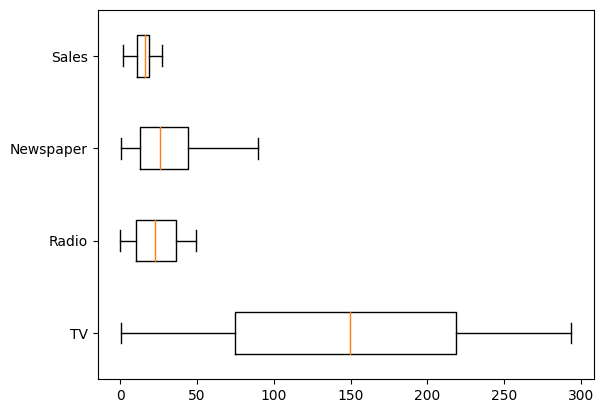

In [34]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

TV              Axes(0.125,0.712609;0.168478x0.167391)
Radio        Axes(0.327174,0.712609;0.168478x0.167391)
Newspaper    Axes(0.529348,0.712609;0.168478x0.167391)
Sales        Axes(0.731522,0.712609;0.168478x0.167391)
dtype: object

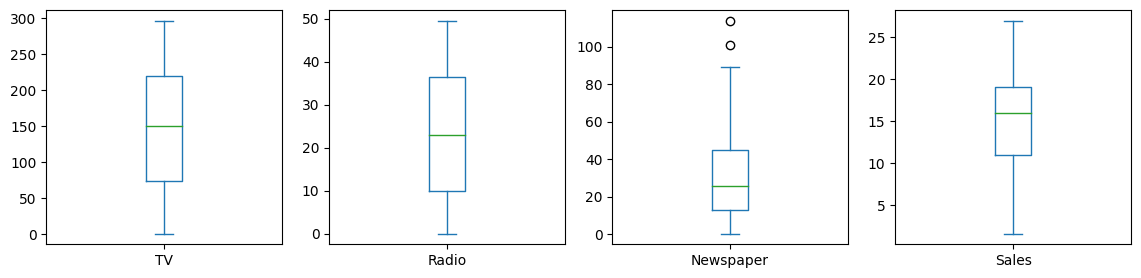

In [11]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(14, 14))

In [12]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [13]:
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1 
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


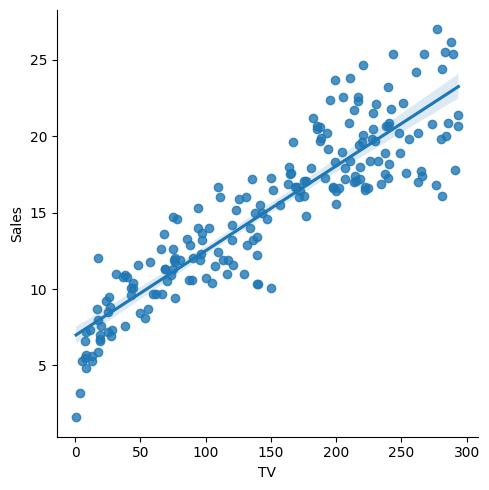

In [14]:
import seaborn as sns
sns.lmplot(x='TV', y='Sales', data=df)

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


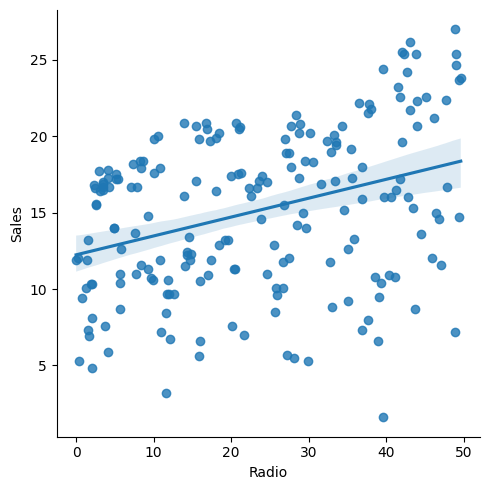

In [15]:
import seaborn as sns
sns.lmplot(x='Radio', y='Sales', data=df)

's'

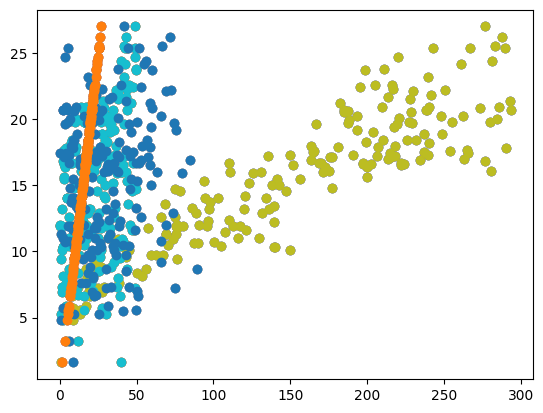

In [33]:
def sc():
    l=df.columns
    for i in range(len(l)-1):
        for j in l:
            s = plt.scatter(j,'Sales',data=df)
    return 's'
sc()

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


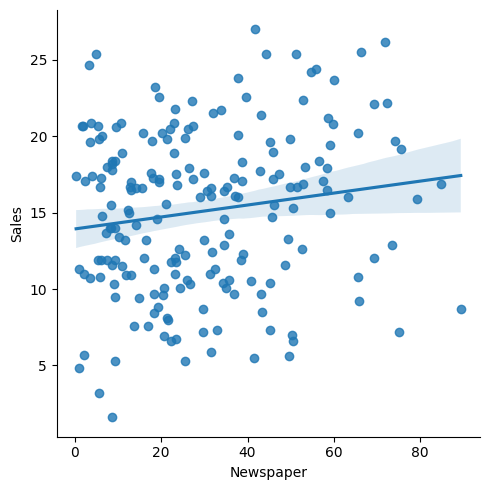

In [16]:
import seaborn as sns
sns.lmplot(x='Newspaper', y='Sales', data=df)

In [17]:
df.corr()['Sales']

TV           0.899974
Radio        0.348566
Newspaper    0.151764
Sales        1.000000
Name: Sales, dtype: float64

In [18]:
df.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [19]:
x=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']

In [20]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158,)
(40,)


In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
# constant (b - bias)
model.intercept_

# coefficients (w - weights)
model.coef_

array([4.64789875, 1.61586984, 0.14462987])

In [26]:
y_pred=model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)
r2_score=r2_score(y_test,y_pred)
print(r2_score*100)

1.6453460885822835
90.26978637834333


In [28]:
print(y_pred)

[15.06202574  8.49516683 16.2966903  14.67752369  9.55770843 15.21069663
 10.70016397 15.24810028  9.96063182 17.66920017 23.48109442  6.22383861
 18.02455625 16.79454162 12.6152365  13.08585299  9.77657696 10.06672393
  9.8712267  18.97458523 21.69132808 12.24259897 10.57446851 13.7425322
 10.29630121 17.99890334 14.53912342 20.45450367 22.38134058 16.4975635
 24.23708226 22.69857712  9.67371678 24.94121949 18.71943633 10.07786336
 21.57900124 15.73954313 13.55447575 10.57340354]


In [29]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': y_pred.flatten()})
act_predict.head(5)

,Actual,Predict
0,14.6,15.062026
1,8.4,8.495167
2,16.0,16.296690
3,16.7,14.677524
4,8.8,9.557708


<Axes: >

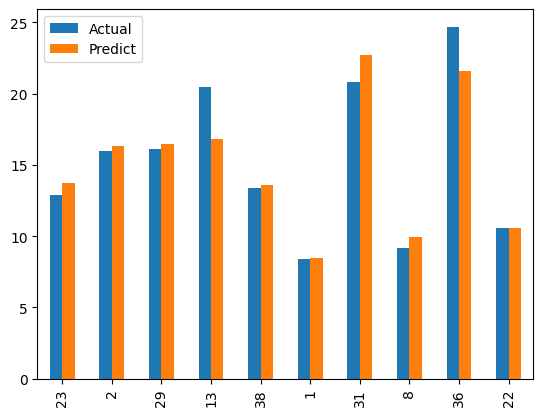

In [30]:
act_predict.sample(10).plot(kind='bar')

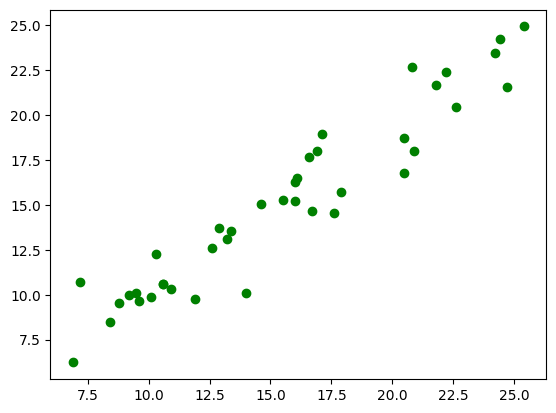

In [31]:
plt.scatter(y_test,y_pred,c='g')

In [32]:
# Calculate the R-squared value for the train data
train_score = model.score(X_train, y_train)

# Calculate the R-squared value for the test data
test_score = model.score(X_test, y_test)

# Print the R-squared values for both the train and test data
print("R-squared value for train data:", train_score*100)
print("R-squared value for test data:", test_score*100)

R-squared value for train data: 89.95394667395139
R-squared value for test data: 90.26978637834333
